In [33]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import Dense, Flatten, Dropout
#from keras.datasets import mnist
import pandas as pd

In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [35]:
x_train = x_train / 255
x_test = x_test / 255

In [36]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [37]:
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [40]:
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8205 - loss: 0.5734 - val_accuracy: 0.9621 - val_loss: 0.1248
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9498 - loss: 0.1658 - val_accuracy: 0.9707 - val_loss: 0.1050
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9619 - loss: 0.1224 - val_accuracy: 0.9721 - val_loss: 0.0941
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9672 - loss: 0.1054 - val_accuracy: 0.9775 - val_loss: 0.0801
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9715 - loss: 0.0901 - val_accuracy: 0.9728 - val_loss: 0.0951
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9739 - loss: 0.0826 - val_accuracy: 0.9764 - val_loss: 0.0849
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9796 - loss: 0.0705 - val_accuracy: 0.9762 - val_loss: 0.0852
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9786 - loss: 0.0666 - 

### Accuracy и loss для тестовой выборки

In [41]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.9755 - loss: 0.0880


[0.07554419338703156, 0.9793999791145325]

### Accuracy по эпохам обучения для тренировочной и валидационной выборок

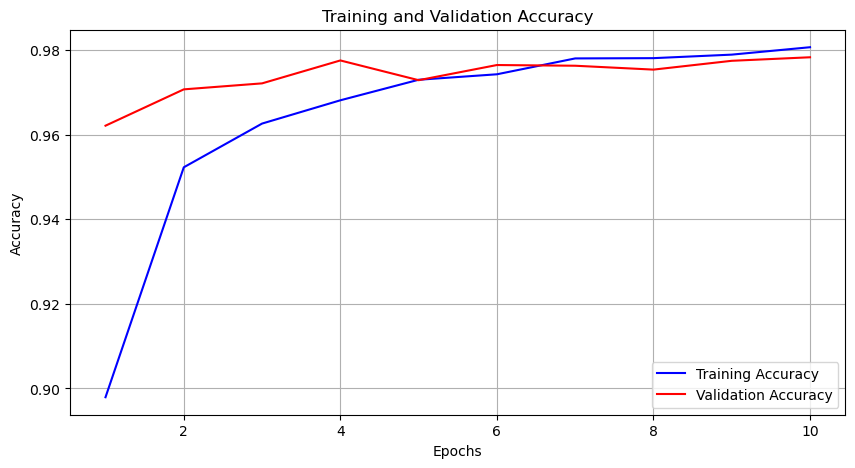

In [50]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=4)
plt.grid(True)

### Предсказание для случайного числа из тестовой выборки

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[4.6168569e-11 1.1868830e-08 9.9999940e-01 4.4446105e-07 6.7272026e-08
  3.6783684e-10 2.3286437e-09 1.0934393e-08 9.8472430e-10 3.9947776e-12]]
2


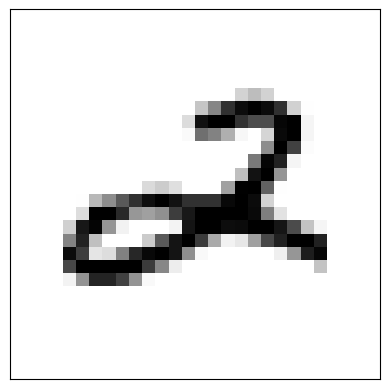

In [43]:
n = np.random.randint(0, 10000)
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(np.argmax(res))
plt.xticks([])
plt.yticks([])

plt.imshow(x_test[n], cmap=plt.cm.binary);



In [44]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


In [45]:
pred_df = pd.DataFrame()
pred_df['Prediction'] = pred
pred_df['y'] = y_test

In [46]:
wrong_pred = pred_df[pred_df['Prediction'] != pred_df['y']]

### Первые 25 неправильных предсказаний из тестовой выборки

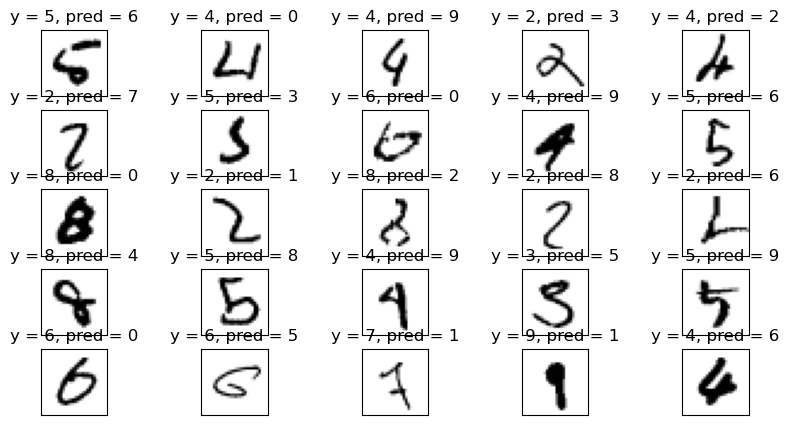

In [47]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'y = {wrong_pred.iloc[i]['y']}, pred = {wrong_pred.iloc[i]['Prediction']}')
    plt.imshow(x_test[wrong_pred.index[i]], cmap=plt.cm.binary)

In [48]:
model.save('mnist_2_layers.keras')